In [8]:
import os
#path = os.path.abspath(os.path.join('..','..'))
#print(path)
#import sys

#sys.path.insert(0,path)
#print(sys.executable)

from dcapy import dca
from dcapy.models import CashFlow, ChgPts, CashFlowModel, CashFlowInput, Period, Scenario

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import seaborn as sns

In [9]:
p1_dict = {
    'name':'pdp',
    'dca': {
        'ti':'2021-01-01',
        'di':0.3,
        'freq_di':'A',
        'qi':1000,
        'b':0,
        'fluid_rate':1200
    },
    'start':'2021-01-01',
    'end':'2027-01-01',
    'freq_input':'M',
    'freq_output':'M',
    'rate_limit': 400
}

p2_dict = {
    'name':'pud',
    'dca': {
        'ti':'2022-01-01',
        'di':0.3,
        'freq_di':'A',
        'qi':1500,
        'b':0,
        'fluid_rate':1600
    },
    'start':'2022-01-01',
    'end':'2027-01-01',
    'freq_input':'M',
    'freq_output':'M',
    'depends':{'period':'pdp'}
}

p1 = Period(**p1_dict)
p2 = Period(**p2_dict)



In [10]:
#p1.generate_forecast()

In [11]:
s1 = Scenario(name='base', periods=[p1,p2])
s1

Scenario(name='base', periods=[Period(name='pdp', dca=Declination 
 Ti: 2021-01-01 
 Qi: 1000.0 bbl/d 
 Di: 0.3 A 
 b: 0.0, start=datetime.date(2021, 1, 1), end=datetime.date(2027, 1, 1), time_list=None, freq_input='M', freq_output='M', rate_limit=400.0, cum_limit=None, iter=1, ppf=None, cashflow_params=None, cashflow=None, depends=None, forecast=None), Period(name='pud', dca=Declination 
 Ti: 2022-01-01 
 Qi: 1500.0 bbl/d 
 Di: 0.3 A 
 b: 0.0, start=datetime.date(2022, 1, 1), end=datetime.date(2027, 1, 1), time_list=None, freq_input='M', freq_output='M', rate_limit=None, cum_limit=None, iter=1, ppf=None, cashflow_params=None, cashflow=None, depends=Depends(period='pdp', delay=None), forecast=None)], cashflow_params=None, cashflow=None, forecast=None)

In [12]:
fore1 = s1.generate_forecast()

/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:273: RuntimeWarning: invalid value encountered in true_divide
  (np.power(qi / rate, b) - 1)/(b * di)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np

<AxesSubplot:xlabel='date', ylabel='oil_rate'>

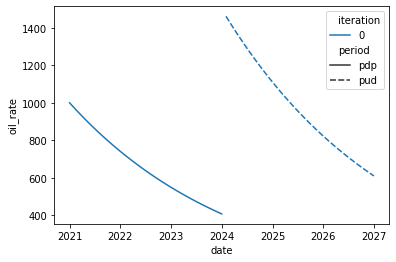

In [13]:
sns.lineplot(data=fore1,  x=fore1.index.to_timestamp(), y='oil_rate', hue='iteration', style='period')

In [14]:
fore1


,oil_rate,oil_cum,iteration,oil_volume,fluid_rate,water_rate,bsw,wor,water_cum,fluid_cum,water_volume,fluid_volume,period,scenario
date,,,,,,,,,,,,,,
2021-01,1000.000000,0.000000e+00,0,0.000000,1200.0,200.000000,0.166667,0.200000,0.000000,0.0,0.000000,0.0,pdp,base
2021-02,974.842410,3.060840e+04,0,30608.401448,1200.0,225.157590,0.187631,0.230968,6979.885297,37200.0,6979.885297,37200.0,pdp,base
2021-03,952.663864,5.759230e+04,0,26983.896891,1200.0,247.336136,0.206113,0.259626,13905.297095,70800.0,6925.411797,33600.0,pdp,base
2021-04,928.697137,8.675182e+04,0,29159.518006,1200.0,271.302863,0.226086,0.292133,22315.685840,108000.0,8410.388745,37200.0,pdp,base
2021-05,906.077771,1.142720e+05,0,27520.229289,1200.0,293.922229,0.244935,0.324390,31133.352719,144000.0,8817.666879,36000.0,pdp,base
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-09,673.624236,1.005424e+06,0,21150.660691,1600.0,926.375764,0.578985,1.375211,568607.208089,2726400.0,28717.648688,49600.0,pud,base
2026-10,657.217430,1.025385e+06,0,19961.613622,1600.0,942.782570,0.589239,1.434506,596890.685185,2774400.0,28283.477096,48000.0,pud,base
2026-11,640.683423,1.045502e+06,0,20116.374941,1600.0,959.316577,0.599573,1.497333,626629.499061,2824000.0,29738.813876,49600.0,pud,base
